# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
%matplotlib inline
# import numpy and pandas

import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy.stats import f_oneway, f

import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [4]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [5]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [6]:
fifa['ValueNumeric']=[j[0].replace('€','')+j[1].replace('M','00000').replace('K','00') if len(j)>1 else j[0].replace('€','').replace('M','000000').replace('K','000') for i in fifa.Value for j in [i.split('.')] ] 

In [7]:
fifa['ValueNumeric'] = fifa['ValueNumeric'].astype('int')

In [8]:
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
ValueNumeric        int64
dtype: object

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [9]:
# Your code here:

formula = 'fifa["ValueNumeric"] ~ C(fifa["Position"]) + C(fifa["Preferred Foot"])'

modelo = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(modelo, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
"C(fifa[""Position""])",1.657002e+16,26.0,20.885022,1.634952e-96
"C(fifa[""Preferred Foot""])",2.341622e+14,1.0,7.673655,5.608990e-03
Residual,5.529029e+17,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [10]:
# Your conclusions here:

# Since p value is less than 0.05 the null hypothesis can be rejecte and there is a significantly difference between the groups. 

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [11]:
# Your code here:

formula = 'fifa["ValueNumeric"] ~ C(fifa["Nationality"])'

modelo = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(modelo, typ=1)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
"C(fifa[""Nationality""])",163.0,3.281224e+16,2.013021e+14,6.762478,4.840477e-134
Residual,18043.0,5.370951e+17,2.976751e+13,NaN,NaN


What is your conclusion from this ANOVA?

In [112]:
# Since p value is less than 0.05 the null hypothesis cab be rejecte and there is a significantly difference between the groups.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [113]:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [114]:
fifa_null[fifa_null > 0]

Club              241
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
dtype: int64

In [115]:
# Your code here:

fifa = fifa.dropna()

In [116]:
fifa.shape

(17918, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [117]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [118]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [119]:
# Your code here:

y = fifa['ValueNumeric']

x = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])

modelo = sm.OLS(y, x).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          8.04e-193
Time:                        12:35:34   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [120]:
# Your conclusions here:
 
# The r squared is very low which means that there is not correlation between the variables
# Since the f test is less than 0. 05 the null hypothesis can be rejected

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [121]:
# Your code here:

y = fifa['ValueNumeric']

x = sm.add_constant(fifa['Potential'])

modelo = sm.OLS(y, x).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:35:35   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [122]:
# Your conclusions here:

# The r squared predict the variation with 33%
# Since the f test is less than 0. 05 the null hypothesis can be rejected

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

<AxesSubplot:xlabel='Potential', ylabel='ValueNumeric'>

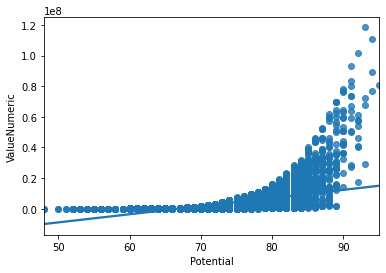

In [127]:
# Your code here:

sns.regplot('Potential', 'ValueNumeric', data=fifa)

In [128]:
# minimal linear relation, but maybe a hiperbolic regression will be more suited